In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

# EXERCISE 1

## Part 1

In [2]:
# Parameters of the poisson process
T = 100
N = 42
lam = N / T
print("λ =", lam)

# Number of poisson process simulations
repetitions = int(1e6)

λ = 0.42


In [3]:
def get_interarrival_times_from_uniform(
    T: float, N: int, repetitions: int = 1
) -> np.ndarray:
    """
    Generate interarrival times from a uniform sample of size N in the interval [0, T].

    Args:
        T (float): The upper limit of the interval.
        N (int): The number of samples to generate.
        repetitions (int): The number of repetitions. Default is 1.
    Returns:
        np.ndarray: A 2D array of shape (repetitions, N) containing the interarrival times.
    """
    # Generate arrivals from uniform distribution
    samples = np.random.uniform(0, T, (repetitions, N))
    samples.sort(axis=1)  # sort each row to ease the calculation of interarrival times

    # Calculate interarrival times
    interarrivals = np.concatenate(
        (samples[:, :1], np.diff(samples, axis=1)), axis=1
    )  # shape (repetitions, N)

    return interarrivals

In [4]:
interarrivals = get_interarrival_times_from_uniform(T, N, repetitions)
all_interarrivals = interarrivals.flatten()

In [5]:
samples_means = np.mean(interarrivals, axis=1)
samples_vars = np.var(interarrivals, axis=1)

estimated_mean = np.mean(samples_means)
estimated_var = np.mean(samples_vars)

aggregated_mean = np.mean(all_interarrivals)
aggregated_var = np.var(all_interarrivals)

# Calculate the 95% confidence interval using bootstrap percentile method
b_means = np.zeros(999)
b_vars = np.zeros(999)
b_aggr_means = np.zeros(999)
b_aggr_vars = np.zeros(999)
for i in range(999):
    b_mean_samples = np.random.choice(samples_means, size=repetitions, replace=True)
    b_means[i] = np.mean(b_mean_samples)

    b_var_samples = np.random.choice(samples_vars, size=repetitions, replace=True)
    b_vars[i] = np.mean(b_var_samples)

    b_aggr_mean_samples = np.random.choice(
        all_interarrivals, size=repetitions, replace=True
    )
    b_aggr_means[i] = np.mean(b_aggr_mean_samples)

    b_aggr_var_samples = np.random.choice(
        all_interarrivals, size=repetitions, replace=True
    )
    b_aggr_vars[i] = np.var(b_aggr_var_samples)
# Sort the bootstrap means and variances
b_means.sort()
b_vars.sort()
b_aggr_means.sort()
b_aggr_vars.sort()

# Calculate the 95% confidence interval
mean_ci_lower, mean_ci_upper = b_means[25], b_means[975]
var_ci_lower, var_ci_upper = b_vars[25], b_vars[975]
aggr_mean_ci_lower, aggr_mean_ci_upper = b_aggr_means[25], b_aggr_means[975]
aggr_var_ci_lower, aggr_var_ci_upper = b_aggr_vars[25], b_aggr_vars[975]

# Calculate the 99% confidence interval
mean_ci_lower_99, mean_ci_upper_99 = b_means[5], b_means[995]
var_ci_lower_99, var_ci_upper_99 = b_vars[5], b_vars[995]
aggr_mean_ci_lower_99, aggr_mean_ci_upper_99 = b_aggr_means[5], b_aggr_means[995]
aggr_var_ci_lower_99, aggr_var_ci_upper_99 = b_aggr_vars[5], b_aggr_vars[995]

print("Theoretical mean and variance of the interarrival times")
print(f"Mean:\t{1/lam:.2f}")
print(f"Var:\t{1/(lam**2):.2f}")
print("------------------------------------------------")   
print("Mean of means and mean of variances of samples")
print(
    f"Mean:\t{estimated_mean:.2f}\t95% CI: [{mean_ci_lower:.2f}, {mean_ci_upper:.2f}]"
    + f"\t99% CI: [{mean_ci_lower_99:.2f}, {mean_ci_upper_99:.2f}]"
)
print(
    f"Var:\t{estimated_var:.2f}\t95% CI: [{var_ci_lower:.2f}, {var_ci_upper:.2f}]"
    + f"\t99% CI: [{var_ci_lower_99:.2f}, {var_ci_upper_99:.2f}]"
)
print("------------------------------------------------")
print(f"Aggregated results from the merge of all samples")
print(
    f"Mean:\t{aggregated_mean:.2f}\t95% CI: [{aggr_mean_ci_lower:.2f}, {aggr_mean_ci_upper:.2f}]"
    + f"\t99% CI: [{aggr_mean_ci_lower_99:.2f}, {aggr_mean_ci_upper_99:.2f}]"
)
print(
    f"Var:\t{aggregated_var:.2f}\t95% CI: [{aggr_var_ci_lower:.2f}, {aggr_var_ci_upper:.2f}]"
    + f"\t99% CI: [{aggr_var_ci_lower_99:.2f}, {aggr_var_ci_upper_99:.2f}]"
)

Theoretical mean and variance of the interarrival times
Mean:	2.38
Var:	5.67
------------------------------------------------
Mean of means and mean of variances of samples
Mean:	2.33	95% CI: [2.33, 2.33]	99% CI: [2.33, 2.33]
Var:	5.16	95% CI: [5.16, 5.16]	99% CI: [5.16, 5.17]
------------------------------------------------
Aggregated results from the merge of all samples
Mean:	2.33	95% CI: [2.32, 2.33]	99% CI: [2.32, 2.33]
Var:	5.16	95% CI: [5.14, 5.19]	99% CI: [5.13, 5.20]


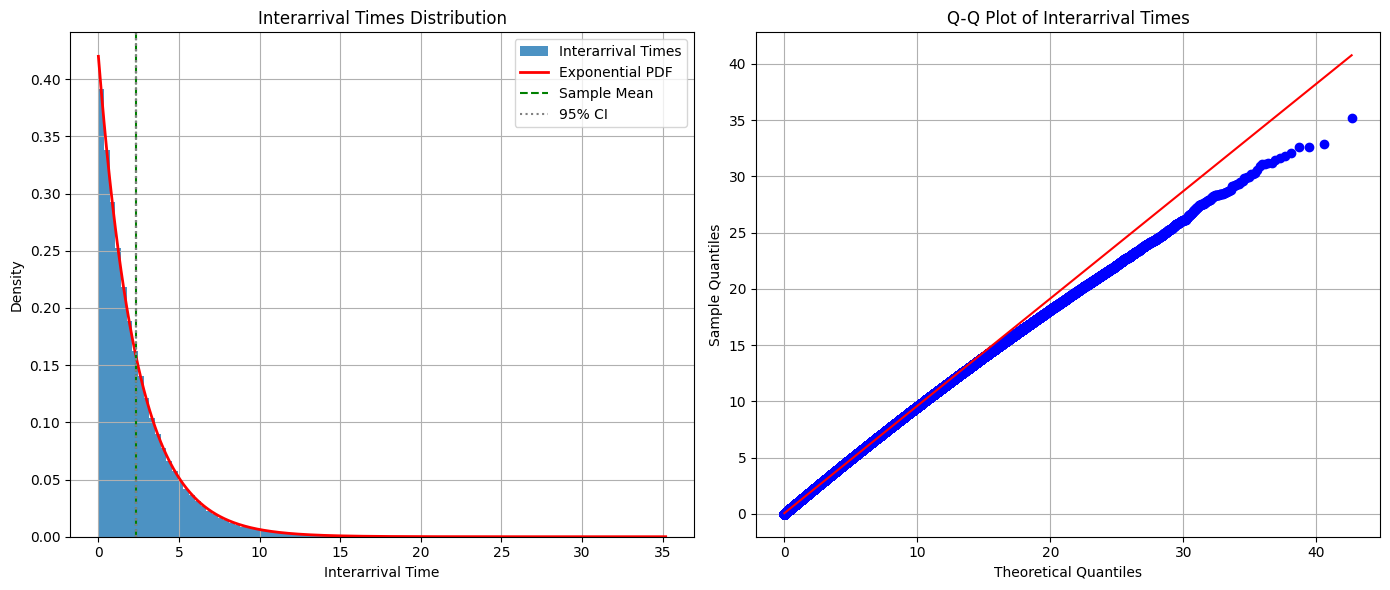

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------- Left Plot: Histogram + PDF --------
ax1 = axes[0]
ax1.hist(
    all_interarrivals, bins=100, density=True, alpha=0.8, label="Interarrival Times"
)

x = np.linspace(0, np.max(all_interarrivals), 1000)
ax1.plot(x, stats.expon.pdf(x, scale=1 / lam), "r-", lw=2, label="Exponential PDF")

# Plot mean and CI
ax1.axvline(aggregated_mean, color="green", linestyle="--", label="Sample Mean")
ax1.axvline(aggr_mean_ci_lower, color="gray", linestyle=":", label="95% CI")
ax1.axvline(aggr_mean_ci_upper, color="gray", linestyle=":")

ax1.set_title("Interarrival Times Distribution")
ax1.set_xlabel("Interarrival Time")
ax1.set_ylabel("Density")
ax1.legend()
ax1.grid()

# -------- Right Plot: Q-Q Plot --------
ax2 = axes[1]
stats.probplot(all_interarrivals, dist="expon", sparams=(0, 1 / lam), plot=ax2)
ax2.set_title("Q-Q Plot of Interarrival Times")
ax2.set_xlabel("Theoretical Quantiles")
ax2.set_ylabel("Sample Quantiles")
ax2.grid()


plt.tight_layout()
plt.show()

## Part 2

In [7]:
def get_arrival_times_from_exp(
    T: float, N: int, lam: float, repetitions: int = 1
) -> np.ndarray:
    """
    Generate arrival times from sampling N exponential interarrival times with rate λ in the interval [0, T].

    Args:
        T (float): The upper limit of the interval.
        N (int): The number of samples to generate.
        lam (float): The rate parameter of the exponential distribution.
        repetitions (int): The number of repetitions. Default is 1.
    Returns:
        np.ndarray: A 2D array of shape (repetitions, N) containing the arrival times.
    """
    samples = np.empty((repetitions, N))
    i = 0

    while i < repetitions:
        #TODO: DaMole98: modified the size to N+1 to do the check of sample[n+1] > T
        sample = np.random.exponential(scale=1 / lam, size=N+1)

        # Compute the cumulative sum of the sample to get arrival times
        sample = np.cumsum(sample)

        # Check if the last arrival time is within the interval [0, T]
        #TODO: DaMole98: modified this condition to remove the bias
        if(sample[N-1] <= T) and (sample[N] > T): #otherwise it is biased towards the lower interarrival times
            samples[i] = sample[:N]
            i += 1
        #if sample[-1] <= T:
        #    samples[i] = sample
        #    i += 1

    return samples

In [8]:
arrivals = get_arrival_times_from_exp(T, N, lam, repetitions)
all_arrivals = arrivals.flatten()

In [9]:
samples_means = np.mean(arrivals, axis=1)
samples_vars = np.var(arrivals, axis=1)

estimated_mean = np.mean(samples_means)
estimated_var = np.mean(samples_vars)

aggregated_mean = np.mean(all_arrivals)
aggregated_var = np.var(all_arrivals)

# Calculate the 95% confidence interval using bootstrap percentile method
b_means = np.zeros(1000)
b_vars = np.zeros(1000)
b_aggr_means = np.zeros(1000)
b_aggr_vars = np.zeros(1000)
for i in range(1000):
    b_mean_samples = np.random.choice(samples_means, size=repetitions, replace=True)
    b_means[i] = np.mean(b_mean_samples)

    b_var_samples = np.random.choice(samples_vars, size=repetitions, replace=True)
    b_vars[i] = np.mean(b_var_samples)

    b_aggr_mean_samples = np.random.choice(all_arrivals, size=repetitions, replace=True)
    b_aggr_means[i] = np.mean(b_aggr_mean_samples)

    b_aggr_var_samples = np.random.choice(all_arrivals, size=repetitions, replace=True)
    b_aggr_vars[i] = np.var(b_aggr_var_samples)
# Sort the bootstrap means and variances
b_means.sort()
b_vars.sort()
b_aggr_means.sort()
b_aggr_vars.sort()

# Calculate the 95% confidence interval
mean_ci_lower, mean_ci_upper = b_means[25], b_means[975]
var_ci_lower, var_ci_upper = b_vars[25], b_vars[975]
aggr_mean_ci_lower, aggr_mean_ci_upper = b_aggr_means[25], b_aggr_means[975]
aggr_var_ci_lower, aggr_var_ci_upper = b_aggr_vars[25], b_aggr_vars[975]

# Calculate the 99% confidence interval
mean_ci_lower_99, mean_ci_upper_99 = b_means[5], b_means[995]
var_ci_lower_99, var_ci_upper_99 = b_vars[5], b_vars[995]
aggr_mean_ci_lower_99, aggr_mean_ci_upper_99 = b_aggr_means[5], b_aggr_means[995]
aggr_var_ci_lower_99, aggr_var_ci_upper_99 = b_aggr_vars[5], b_aggr_vars[995]


print("Theoretical mean and variance of the interarrival times")
print(f"Mean:\t{T / 2:.2f}")
print(f"Var:\t{T**2 / 12:.2f}")
print("------------------------------------------------")
print("Mean of means and mean of variances of samples")
print(
    f"Mean:\t{estimated_mean:.2f}\t95% CI: [{mean_ci_lower:.2f}, {mean_ci_upper:.2f}]"
    + f"\t\t99% CI: [{mean_ci_lower_99:.2f}, {mean_ci_upper_99:.2f}]"
)
print(
    f"Var:\t{estimated_var:.2f}\t95% CI: [{var_ci_lower:.2f}, {var_ci_upper:.2f}]"
    + f"\t99% CI: [{var_ci_lower_99:.2f}, {var_ci_upper_99:.2f}]"
)
print("------------------------------------------------")
print(f"Aggregated results from the merge of all samples")
print(
    f"Mean:\t{aggregated_mean:.2f}\t95% CI: [{aggr_mean_ci_lower:.2f}, {aggr_mean_ci_upper:.2f}]"
    + f"\t\t99% CI: [{aggr_mean_ci_lower_99:.2f}, {aggr_mean_ci_upper_99:.2f}]"
)
print(
    f"Var:\t{aggregated_var:.2f}\t95% CI: [{aggr_var_ci_lower:.2f}, {aggr_var_ci_upper:.2f}]"
    + f"\t99% CI: [{aggr_var_ci_lower_99:.2f}, {aggr_var_ci_upper_99:.2f}]"
)

Theoretical mean and variance of the interarrival times
Mean:	50.00
Var:	833.33
------------------------------------------------
Mean of means and mean of variances of samples
Mean:	50.01	95% CI: [50.00, 50.01]		99% CI: [49.99, 50.02]
Var:	813.50	95% CI: [813.27, 813.73]	99% CI: [813.19, 813.80]
------------------------------------------------
Aggregated results from the merge of all samples
Mean:	50.01	95% CI: [49.95, 50.06]		99% CI: [49.93, 50.07]
Var:	833.39	95% CI: [831.96, 834.92]	99% CI: [831.47, 835.50]


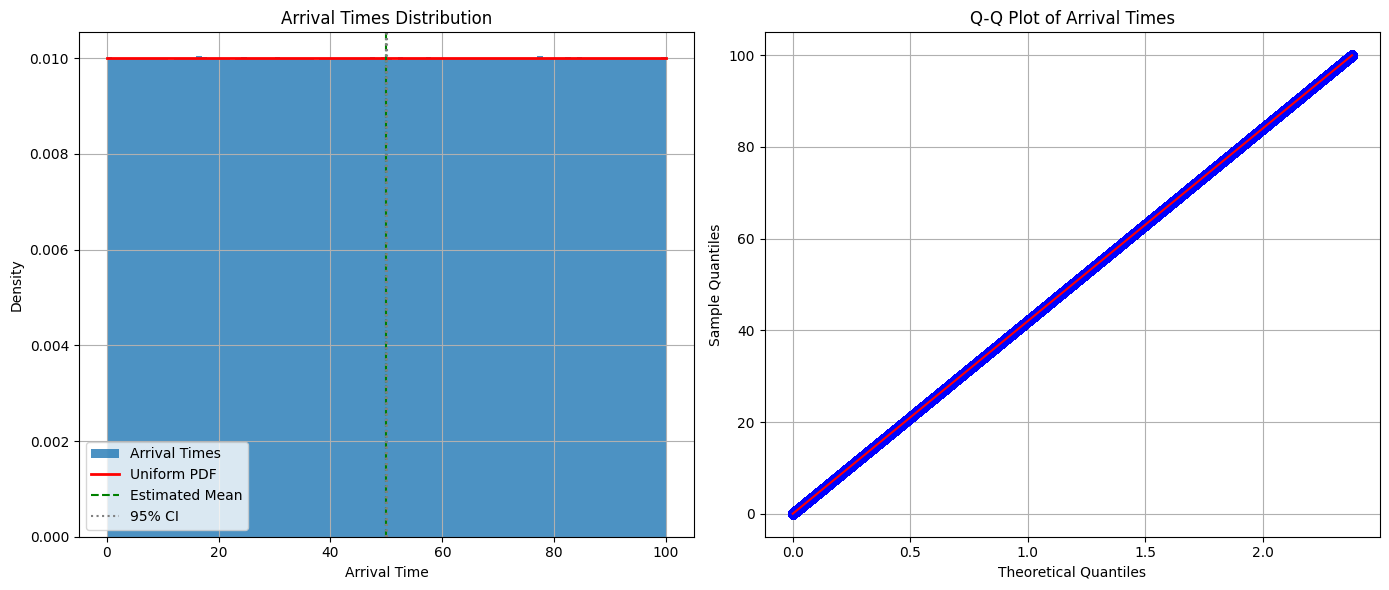

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------- Left Plot: Histogram + PDF --------
ax1 = axes[0]
ax1.hist(all_arrivals, bins=100, density=True, alpha=0.8, label="Arrival Times")

x = np.linspace(0, np.max(all_arrivals), 1000)
ax1.plot(x, stats.uniform.pdf(x, 0, T), "r-", lw=2, label="Uniform PDF")

# Plot mean and CI
ax1.axvline(aggregated_mean, color="green", linestyle="--", label="Estimated Mean")
ax1.axvline(aggr_mean_ci_upper, color="gray", linestyle=":")
ax1.axvline(aggr_mean_ci_lower, color="gray", linestyle=":", label="95% CI")

ax1.set_title("Arrival Times Distribution")
ax1.set_xlabel("Arrival Time")
ax1.set_ylabel("Density")
ax1.legend()
ax1.grid()

# Add mean/var text inside the left plot
textstr = f"Sample Mean: {aggregated_mean:.2f}\nSample Var: {aggregated_var:.2f}"

# -------- Right Plot: Q-Q Plot --------
ax2 = axes[1]
stats.probplot(all_arrivals, dist="uniform", sparams=(0, 1 / lam), plot=ax2)
ax2.set_title("Q-Q Plot of Arrival Times")
ax2.set_xlabel("Theoretical Quantiles")
ax2.set_ylabel("Sample Quantiles")
ax2.grid()

plt.tight_layout()
plt.show()

# EXERCISE 2

In [2]:
A = 8.8480182

In [3]:

def fn_vectorized(x):
    x = np.asarray(x)
    # Only compute for -3 <= x <= 3, else 0
    return np.where((x >= -3) & (x <= 3), (x**2) * (np.sin(np.pi * x))**2, 0)

def f_vectorized(x, A):
    x = np.asarray(x)
    # Only compute for -3 <= x <= 3, else 0
    return np.where((x >= -3) & (x <= 3), (1/A) * (x**2) * (np.sin(np.pi * x))**2, 0)

def g_vectorized(x):
    x = np.asarray(x)
    return np.where((x >= -3) & (x <= 3), (x**2)/18, 0)

def cg_vectorized(x, A):
    x = np.asarray(x)
    return np.where((x >= -3) & (x <= 3), (x**2)/A, 0)

def g_inv_vectorized(u):
    u = np.asarray(u)
    # Using np.sqrt ensures the square root is computed correctly for negative numbers.
    return np.where((u >= 0) & (u <= 1), 3*np.cbrt(2*(u-(1/2))), 0)

def cg_inv_vectorized(u, A):
    u = np.asarray(u)
    # Using np.cbrt ensures the cube root is computed correctly for negative numbers.
    return np.where((u >= 0) & (u <= 1), np.cbrt(3*A*u - 27), 0)



In [4]:
# rejection sampling

def rejection_sampling(num_samples=1000):
    # Sample X from proposal g(x) using its inverse CDF
    U1 = np.random.uniform(0, 1, num_samples)
    X = g_inv_vectorized(U1)  # X ~ g(x)

    a = f_vectorized(X, A)
    b = cg_vectorized(X, A)  # scaled cg(x)
    # Sample uniform U2 ~ Uniform[0, cg(X)]
    U2 = np.random.uniform(0, b, num_samples)

    rej_vec = np.where(U2 < a, 1, 0)  # 1 if accepted, 0 if rejected
    acc_count = np.sum(rej_vec)


    return X, rej_vec, acc_count


#rejection sampling without knowledge of the scaling factor of f(x)
def rejection_sampling_2(num_samples=1000):
    X = np.random.uniform(-3, 3, num_samples)
    U = np.random.uniform(0, 9, num_samples)
    
    f_not_normalized = fn_vectorized(X)
    rej_vec = np.where(U < f_not_normalized, 1, 0)  # 1 if accepted, 0 if rejected
    acc_count = np.sum(rej_vec)

    return X, rej_vec, acc_count

    

In [5]:
def sample_valid(n_valid, batch_size):
    """
    Returns an array of n_valid accepted samples using run_rejection_sampling.
    batch_size specifies the number of points to generate in each rejection sampling run.
    """
    accepted_samples = []
    
    while len(accepted_samples) < n_valid:
        X, rej_vec, _ = rejection_sampling(num_samples=batch_size)
        valid_samples = X[rej_vec == 1]
        accepted_samples.extend(valid_samples.tolist())
        
    return np.array(accepted_samples[:n_valid])



In [6]:
#define number of rejection sampling trial and the true function

NUM_SAMPLES = int(1e8)

x_vals = np.linspace(-3, 3, 1000)
y_vals = f_vectorized(x_vals, A)


Acceptance count: 49155978
Acceptance rate: 0.49155978


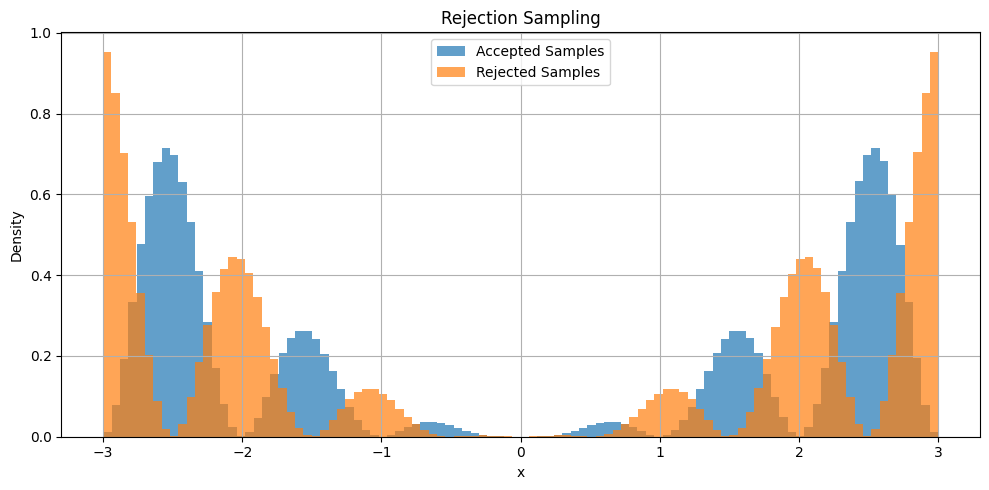

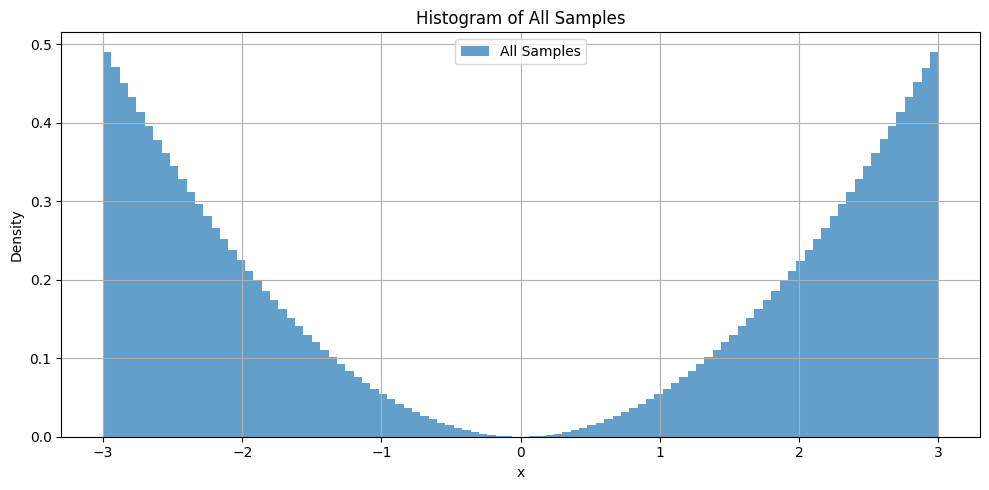

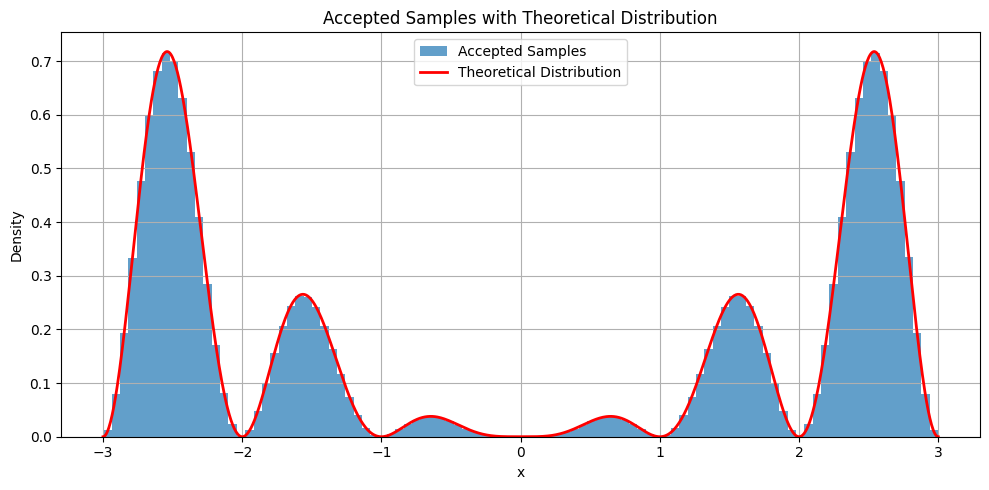

In [7]:

X, rej_vec, acc_count = rejection_sampling(NUM_SAMPLES)

print("Acceptance count:", acc_count)
print("Acceptance rate:", acc_count / NUM_SAMPLES)
    
plt.figure(figsize=(10, 5))
plt.hist(X[rej_vec == 1], bins=100, density=True, alpha=0.7, label='Accepted Samples')
plt.hist(X[rej_vec == 0], bins=100, density=True, alpha=0.7, label='Rejected Samples')
plt.title("Rejection Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the histogram of all samples
plt.figure(figsize=(10, 5))
plt.hist(X, bins=100, density=True, alpha=0.7, label='All Samples')
plt.title("Histogram of All Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the histogram of accepted samples with the theoretical distribution
plt.figure(figsize=(10, 5))
plt.hist(X[rej_vec == 1], bins=100, density=True, alpha=0.7, label='Accepted Samples')
plt.plot(x_vals, y_vals, label='Theoretical Distribution', color='red', linewidth=2)
plt.title("Accepted Samples with Theoretical Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Acceptance count: 16390585
Acceptance rate: 0.16390585


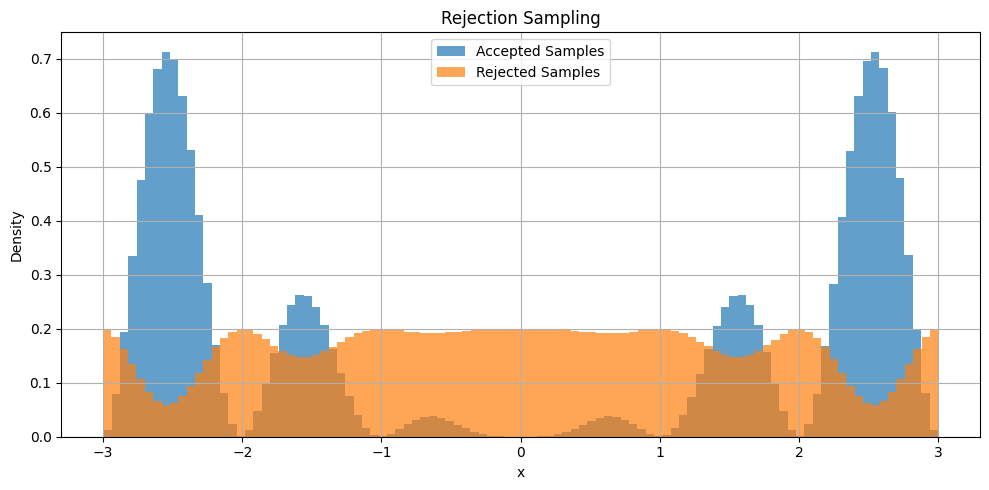

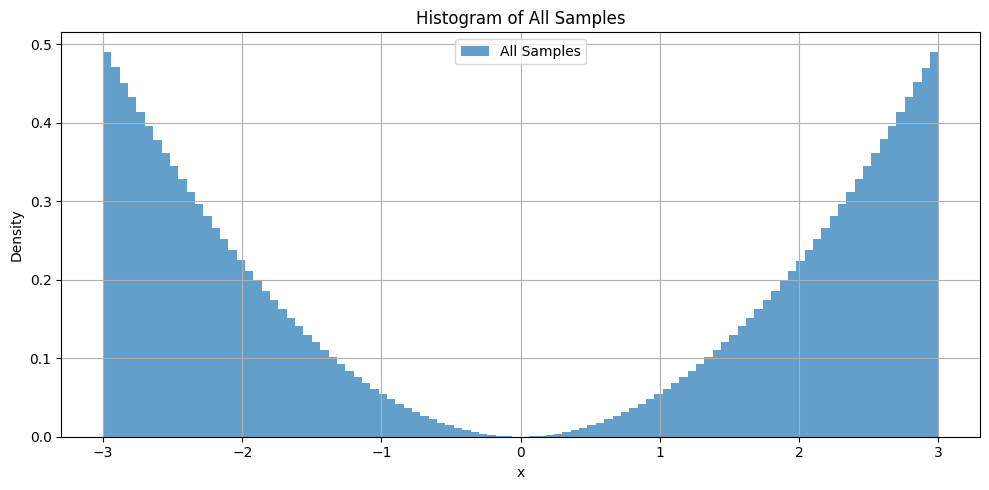

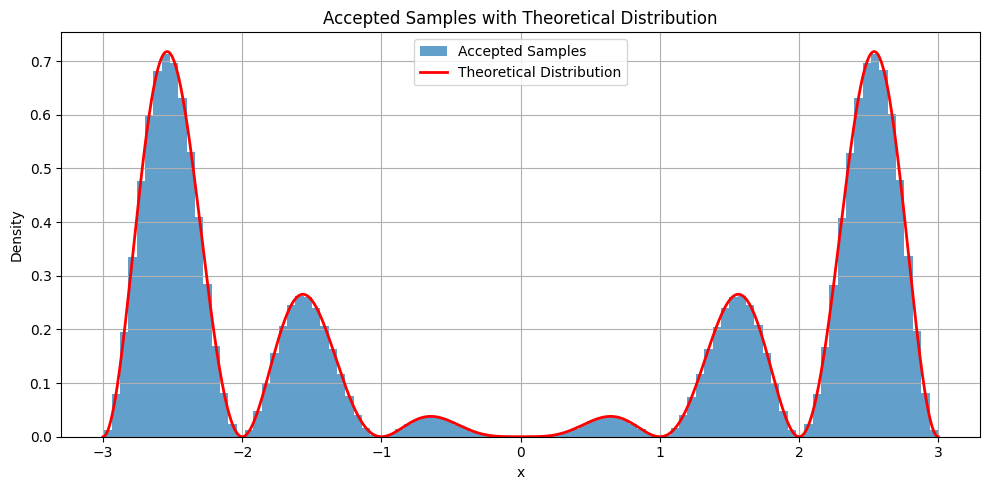

In [8]:
X2, rej_vec2, acc_count2 = rejection_sampling_2(NUM_SAMPLES)

print("Acceptance count:", acc_count2)
print("Acceptance rate:", acc_count2 / NUM_SAMPLES)
    
plt.figure(figsize=(10, 5))
plt.hist(X2[rej_vec2 == 1], bins=100, density=True, alpha=0.7, label='Accepted Samples')
plt.hist(X2[rej_vec2 == 0], bins=100, density=True, alpha=0.7, label='Rejected Samples')
plt.title("Rejection Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the histogram of all samples
plt.figure(figsize=(10, 5))
plt.hist(X, bins=100, density=True, alpha=0.7, label='All Samples')
plt.title("Histogram of All Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the histogram of accepted samples with the theoretical distribution
plt.figure(figsize=(10, 5))
plt.hist(X2[rej_vec2 == 1], bins=100, density=True, alpha=0.7, label='Accepted Samples')
plt.plot(x_vals, y_vals, label='Theoretical Distribution', color='red', linewidth=2)
plt.title("Accepted Samples with Theoretical Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Median: -1.3782708092351497
Confidence Interval: (-1.6960999407961013, 1.4585484929276047)
Confidence Interval width: 3.1546484337237057
0.9 Quantile: 2.6403008467131888
Confidence Interval: (2.5745544299592957, 2.7219864447092195)
Confidence Interval width: 0.14743201474992373
Mean: -0.16777703885559944
Confidence Interval: (-0.4859498396716382, 0.15039576196043927)
Confidence Interval width: 0.6363456016320774


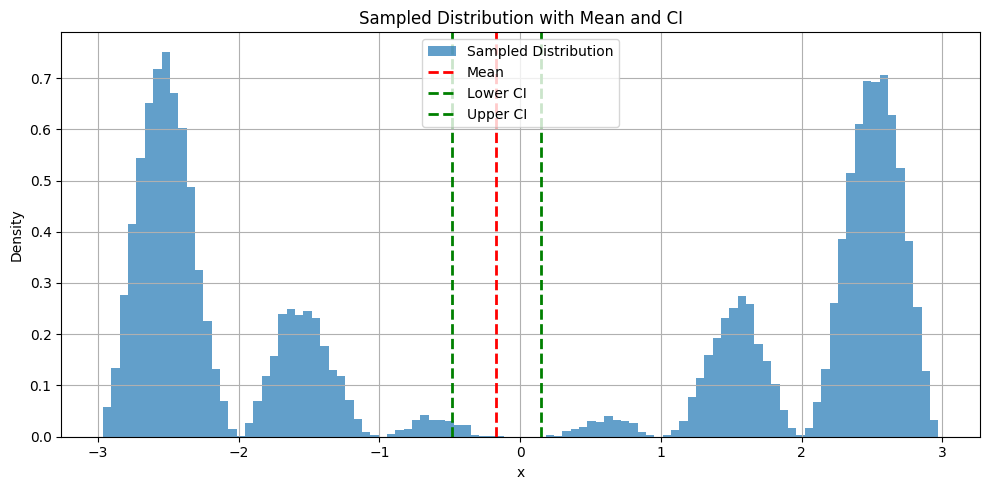

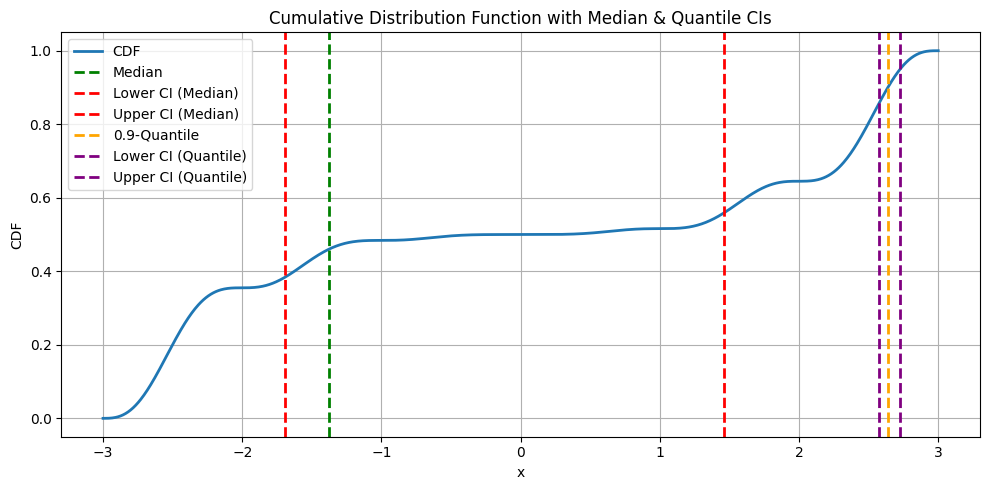

In [ ]:
num_samples = 20000
sample = sample_valid(n_valid=num_samples, batch_size=1000)

num_subsamples = 200
subsample = sample[:num_subsamples]  # Take the first 200 samples

ordered_subsample = np.sort(subsample)

# Median
median = np.median(ordered_subsample)

l_idx_CI = math.floor(
    (0.5 * num_subsamples) - 1.96 * math.sqrt(num_subsamples * 0.5 * (1 - 0.5))
)
u_idx_CI = math.ceil(
    (0.5 * num_subsamples) + 1 + (1.96 * math.sqrt(num_subsamples * 0.5 * (1 - 0.5)))
)

l_CI = ordered_subsample[l_idx_CI]
u_CI = ordered_subsample[u_idx_CI]


# 0.9 quantile

q = 0.9
quantile = np.quantile(ordered_subsample, q)

l_idx_q = math.floor(
    (q * num_subsamples) - 1.96 * math.sqrt(num_subsamples * q * (1 - q))
)
u_idx_q = math.ceil(
    (q * num_subsamples) + 1 + (1.96 * math.sqrt(num_subsamples * q * (1 - q)))
)

l_CI_q = ordered_subsample[l_idx_q]
u_CI_q = ordered_subsample[u_idx_q]

# Mean
sample_std_dev = np.std(
    subsample, ddof=1
)  # Sample standard deviation with Bessel's correction
sample_mean = np.mean(subsample)
l_CI_mean = sample_mean - 1.96 * sample_std_dev / math.sqrt(num_subsamples)
u_CI_mean = sample_mean + 1.96 * sample_std_dev / math.sqrt(num_subsamples)


print("Median:", median)
print("Confidence Interval:", (float(l_CI), float(u_CI)))
print("Confidence Interval width:", float(u_CI) - float(l_CI))
print("=================================================================")
print("0.9 Quantile:", quantile)
print("Confidence Interval:", (float(l_CI_q), float(u_CI_q)))
print("Confidence Interval width:", float(u_CI_q) - float(l_CI_q))
print("=================================================================")
print("Mean:", sample_mean)
print("Confidence Interval:", (float(l_CI_mean), float(u_CI_mean)))
print("Confidence Interval width:", float(u_CI_mean) - float(l_CI_mean))


plt.figure(figsize=(10, 5))
plt.hist(sample, bins=100, density=True, alpha=0.7, label="Sampled Distribution")
plt.axvline(sample_mean, color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(l_CI_mean, color="green", linestyle="dashed", linewidth=2, label="Lower CI")
plt.axvline(u_CI_mean, color="green", linestyle="dashed", linewidth=2, label="Upper CI")
plt.title("Sampled Distribution with Mean and CI")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Create x-values matching the density array and compute the CDF.
x_points = np.linspace(-3, 3, len(y_vals))
dx = x_points[1] - x_points[0]
cdf = np.cumsum(y_vals) * dx

plt.figure(figsize=(10, 5))
plt.plot(x_points, cdf, linewidth=2, label="CDF")

# Add median and its confidence intervals.
plt.axvline(median, color="green", linestyle="dashed", linewidth=2, label="Median")
plt.axvline(
    l_CI, color="red", linestyle="dashed", linewidth=2, label="Lower CI (Median)"
)
plt.axvline(
    u_CI, color="red", linestyle="dashed", linewidth=2, label="Upper CI (Median)"
)

# Add quantile and its confidence intervals.
plt.axvline(
    quantile, color="orange", linestyle="dashed", linewidth=2, label=f"{q}-Quantile"
)
plt.axvline(
    l_CI_q, color="purple", linestyle="dashed", linewidth=2, label="Lower CI (Quantile)"
)
plt.axvline(
    u_CI_q, color="purple", linestyle="dashed", linewidth=2, label="Upper CI (Quantile)"
)

plt.title("Cumulative Distribution Function with Median & Quantile CIs")
plt.xlabel("x")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Median: -1.3782708092351497
Confidence Interval: (-1.5161946347808166, 1.4947758951594494)
Confidence Interval width: 3.0109705299402663
0.9 Quantile: 2.6403008467131888
Confidence Interval: (2.5681980891360285, 2.6927963244406263)
Confidence Interval width: 0.12459823530459779
Mean: -0.16777703885559944
Confidence Interval: (-0.33083853441987077, 0.3249189643422051)
Confidence Interval width: 0.6557574987620758


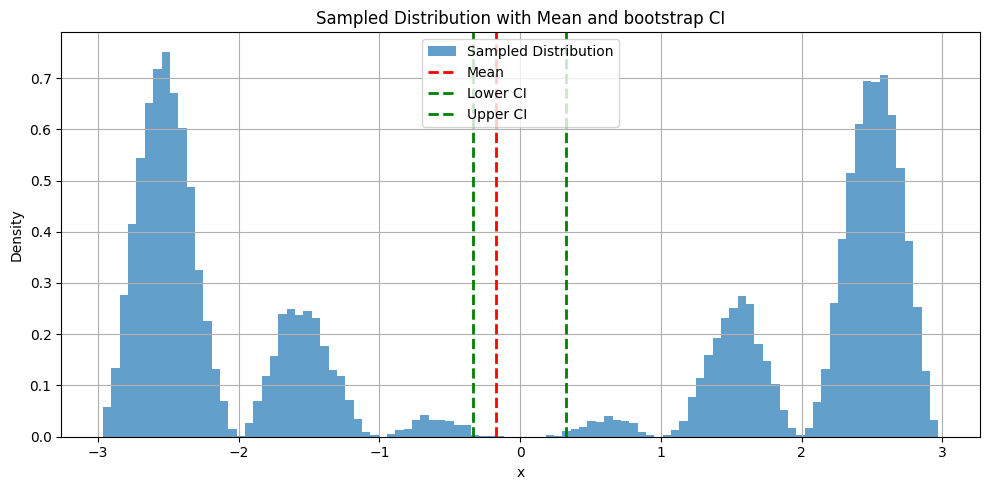

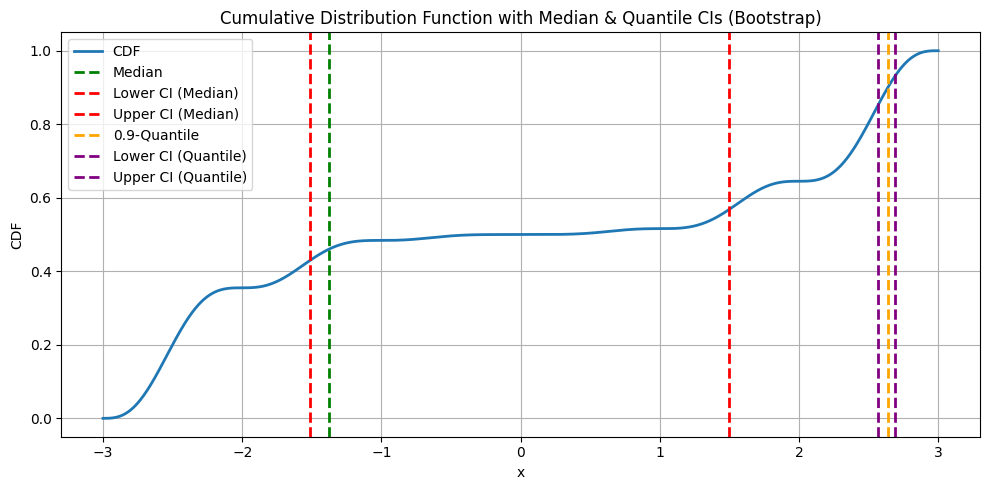

In [10]:
# Computing confidence intervals with bootstrap procedure

for i in range(999):
    # Generate bootstrap samples
    boot_sample = np.random.choice(sample, size=num_subsamples, replace=True)
    b_median = np.median(boot_sample)
    b_quantile = np.quantile(boot_sample, q)
    b_mean = np.mean(boot_sample)

    if i == 0:
        medians = np.array([b_median])
        quantiles = np.array([b_quantile])
        means = np.array([b_mean])

    else:
        medians = np.append(medians, b_median)
        quantiles = np.append(quantiles, b_quantile)
        means = np.append(means, b_mean)

# Sort
medians = list(np.sort(medians))
quantiles = list(np.sort(quantiles))
means = list(np.sort(means))

# Compute the confidence intervals

med_l_CI_boot = medians[25 - 1]
med_u_CI_boot = medians[975 - 1]

q_l_CI_boot = quantiles[25 - 1]
q_u_CI_boot = quantiles[975 - 1]

mean_l_CI_boot = means[25 - 1]
mean_u_CI_boot = means[975 - 1]

print("Median:", median)
print("Confidence Interval:", (float(med_l_CI_boot), float(med_u_CI_boot)))
print("Confidence Interval width:", float(med_u_CI_boot) - float(med_l_CI_boot))
print("=================================================================")
print("0.9 Quantile:", quantile)
print("Confidence Interval:", (float(q_l_CI_boot), float(q_u_CI_boot)))
print("Confidence Interval width:", float(q_u_CI_boot) - float(q_l_CI_boot))
print("=================================================================")
print("Mean:", sample_mean)
print("Confidence Interval:", (float(mean_l_CI_boot), float(mean_u_CI_boot)))
print("Confidence Interval width:", float(mean_u_CI_boot) - float(mean_l_CI_boot))


plt.figure(figsize=(10, 5))
plt.hist(sample, bins=100, density=True, alpha=0.7, label="Sampled Distribution")
plt.axvline(sample_mean, color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(
    mean_l_CI_boot, color="green", linestyle="dashed", linewidth=2, label="Lower CI"
)
plt.axvline(
    mean_u_CI_boot, color="green", linestyle="dashed", linewidth=2, label="Upper CI"
)
plt.title("Sampled Distribution with Mean and bootstrap CI")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_points, cdf, linewidth=2, label="CDF")

# Add median and its confidence intervals.
plt.axvline(median, color="green", linestyle="dashed", linewidth=2, label="Median")
plt.axvline(
    med_l_CI_boot,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Lower CI (Median)",
)
plt.axvline(
    med_u_CI_boot,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Upper CI (Median)",
)

# Add quantile and its confidence intervals.
plt.axvline(
    quantile, color="orange", linestyle="dashed", linewidth=2, label=f"{q}-Quantile"
)
plt.axvline(
    q_l_CI_boot,
    color="purple",
    linestyle="dashed",
    linewidth=2,
    label="Lower CI (Quantile)",
)
plt.axvline(
    q_u_CI_boot,
    color="purple",
    linestyle="dashed",
    linewidth=2,
    label="Upper CI (Quantile)",
)

plt.title("Cumulative Distribution Function with Median & Quantile CIs (Bootstrap)")
plt.xlabel("x")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Number of confidence intervals (computed with normal approximation) that contain the true mean 0: 95
Number of confidence intervals (computed with bootstrap) that contain the true mean 0: 95


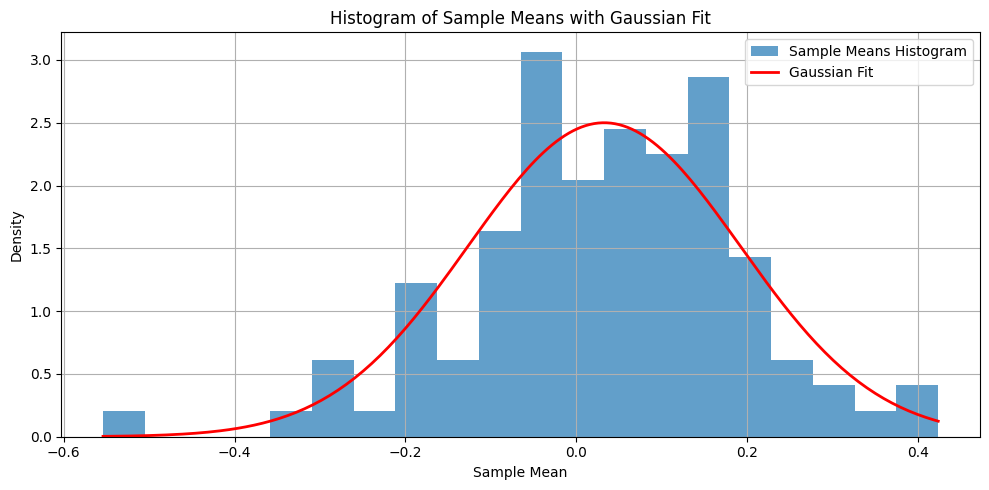

In [11]:

num_samples = 20000
sample = sample_valid(n_valid=num_samples, batch_size=1000)
n_sub = 200
num_bootstrap = 1000 #number of bootstrap repetitions
CI_contains_bootstrap = 0
CI_contains = 0

sm_array = np.empty(100)

for i in range(100):
    subset = sample[i * n_sub:(i + 1) * n_sub]
    bootstrap_means = np.empty(num_bootstrap)

    for j in range(num_bootstrap):
        boot_sample = np.random.choice(subset, size=n_sub, replace=True)
        bootstrap_means[j] = np.mean(boot_sample)
    
    boot_l_CI_mean = np.percentile(bootstrap_means, 2.5)
    boot_u_CI_mean = np.percentile(bootstrap_means, 97.5)
    
    sample_std_dev = np.std(subset, ddof=1)  # Sample standard deviation with Bessel's correction
    sample_mean = np.mean(subset)  
    sm_array[i]= sample_mean
    l_CI_mean = sample_mean - 1.96*sample_std_dev/math.sqrt(len(subset))
    u_CI_mean = sample_mean + 1.96*sample_std_dev/math.sqrt(len(subset))
   

    if l_CI_mean <= 0 <= u_CI_mean:
        CI_contains += 1
    if boot_l_CI_mean <= 0 <= boot_u_CI_mean:
        CI_contains_bootstrap += 1


print("Number of confidence intervals (computed with normal approximation) that contain the true mean 0:", CI_contains)
print("Number of confidence intervals (computed with bootstrap) that contain the true mean 0:", CI_contains_bootstrap)

# Plotting the histogram of sample means
mean_sm = np.mean(sm_array)
std_sm = np.std(sm_array, ddof=1)
x_fit = np.linspace(sm_array.min(), sm_array.max(), 200)
pdf_fit = 1/(std_sm * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x_fit - mean_sm)/std_sm)**2)

plt.figure(figsize=(10, 5))
plt.hist(sm_array, bins=20,density=True, alpha=0.7, label='Sample Means Histogram')
plt.plot(x_fit, pdf_fit, color='red', linewidth=2, label='Gaussian Fit')
plt.title("Histogram of Sample Means with Gaussian Fit")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Median: -1.3782708092351497
Confidence Interval: (-1.4771550060538607, 1.5239111166105135)
Confidence Interval width: 3.0010661226643744
0.9 Quantile: 2.6403008467131888
Confidence Interval: (2.5783290553200855, 2.7026776538635797)
Confidence Interval width: 0.12434859854349423
Mean: 0.08792107560772607
Confidence Interval: (-0.27839917654629476, 0.34081164305691475)
Confidence Interval width: 0.6192108196032096


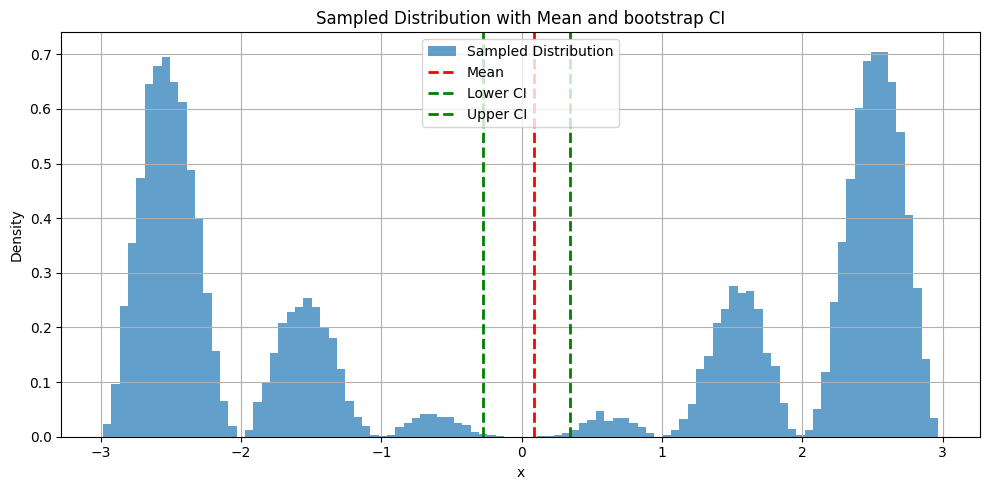

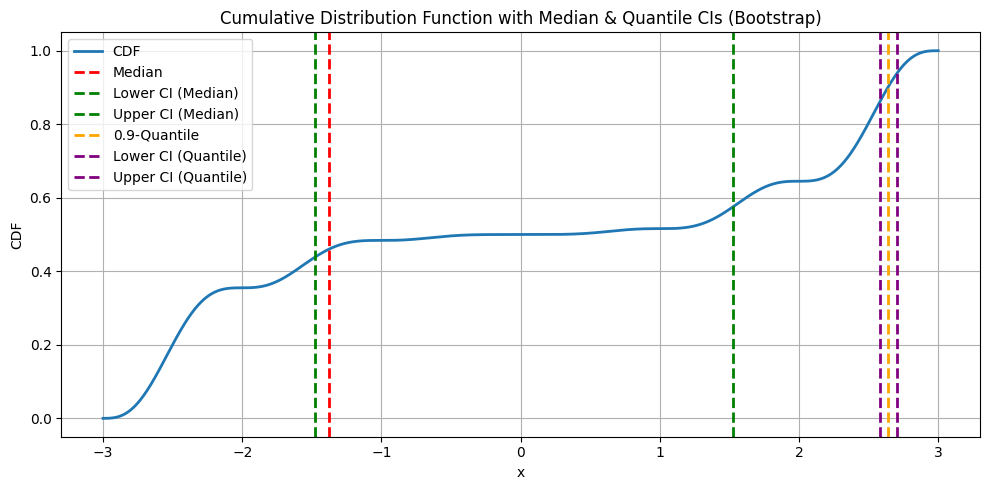

In [12]:
# Computing confidence intervals with bootstrap procedure

for i in range(999):
    # Generate bootstrap samples
    boot_sample = np.random.choice(sample, size=num_subsamples, replace=True)
    b_median = np.median(boot_sample)
    b_quantile = np.quantile(boot_sample, q)
    b_mean = np.mean(boot_sample)

    if i == 0:
        medians = np.array([b_median])
        quantiles = np.array([b_quantile])
        means = np.array([b_mean])

    else:
        medians = np.append(medians, b_median)
        quantiles = np.append(quantiles, b_quantile)
        means = np.append(means, b_mean)

# Sort
medians = list(np.sort(medians))
quantiles = list(np.sort(quantiles))
means = list(np.sort(means))

# Compute the confidence intervals

med_l_CI_boot = medians[25 - 1]
med_u_CI_boot = medians[975 - 1]

q_l_CI_boot = quantiles[25 - 1]
q_u_CI_boot = quantiles[975 - 1]

mean_l_CI_boot = means[25 - 1]
mean_u_CI_boot = means[975 - 1]

print("Median:", median)
print("Confidence Interval:", (float(med_l_CI_boot), float(med_u_CI_boot)))
print("Confidence Interval width:", float(med_u_CI_boot) - float(med_l_CI_boot))
print("=================================================================")
print("0.9 Quantile:", quantile)
print("Confidence Interval:", (float(q_l_CI_boot), float(q_u_CI_boot)))
print("Confidence Interval width:", float(q_u_CI_boot) - float(q_l_CI_boot))
print("=================================================================")
print("Mean:", sample_mean)
print("Confidence Interval:", (float(mean_l_CI_boot), float(mean_u_CI_boot)))
print("Confidence Interval width:", float(mean_u_CI_boot) - float(mean_l_CI_boot))


plt.figure(figsize=(10, 5))
plt.hist(sample, bins=100, density=True, alpha=0.7, label="Sampled Distribution")
plt.axvline(sample_mean, color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(
    mean_l_CI_boot, color="green", linestyle="dashed", linewidth=2, label="Lower CI"
)
plt.axvline(
    mean_u_CI_boot, color="green", linestyle="dashed", linewidth=2, label="Upper CI"
)
plt.title("Sampled Distribution with Mean and bootstrap CI")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_points, cdf, linewidth=2, label="CDF")

# Add median and its confidence intervals.
plt.axvline(median, color="red", linestyle="dashed", linewidth=2, label="Median")
plt.axvline(
    med_l_CI_boot,
    color="green",
    linestyle="dashed",
    linewidth=2,
    label="Lower CI (Median)",
)
plt.axvline(
    med_u_CI_boot,
    color="green",
    linestyle="dashed",
    linewidth=2,
    label="Upper CI (Median)",
)

# Add quantile and its confidence intervals.
plt.axvline(
    quantile, color="orange", linestyle="dashed", linewidth=2, label=f"{q}-Quantile"
)
plt.axvline(
    q_l_CI_boot,
    color="purple",
    linestyle="dashed",
    linewidth=2,
    label="Lower CI (Quantile)",
)
plt.axvline(
    q_u_CI_boot,
    color="purple",
    linestyle="dashed",
    linewidth=2,
    label="Upper CI (Quantile)",
)

plt.title("Cumulative Distribution Function with Median & Quantile CIs (Bootstrap)")
plt.xlabel("x")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Number of confidence intervals (computed with normal approximation) that contain the true mean 0: 92
Number of confidence intervals (computed with bootstrap) that contain the true mean 0: 92


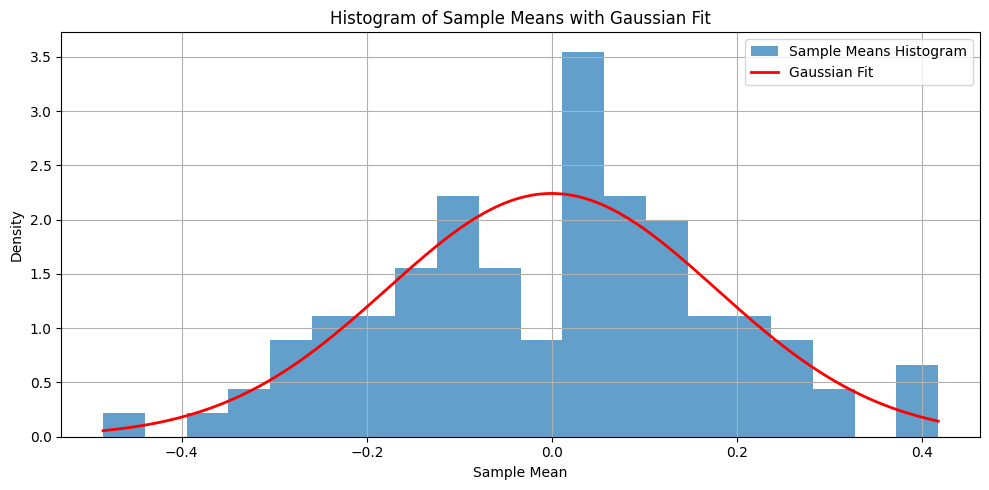

In [13]:
repetitions = 20000
sample = sample_valid(n_valid=repetitions, batch_size=1000)
n_sub = 200
num_bootstrap = 1000  # number of bootstrap repetitions
CI_contains_bootstrap = 0
CI_contains = 0

sm_array = np.empty(100)

for i in range(100):
    subset = sample[i * n_sub : (i + 1) * n_sub]
    bootstrap_means = np.empty(num_bootstrap)

    for j in range(num_bootstrap):
        boot_sample = np.random.choice(subset, size=n_sub, replace=True)
        bootstrap_means[j] = np.mean(boot_sample)

    boot_l_CI_mean = np.percentile(bootstrap_means, 2.5)
    boot_u_CI_mean = np.percentile(bootstrap_means, 97.5)

    sample_std_dev = np.std(
        subset, ddof=1
    )  # Sample standard deviation with Bessel's correction
    sample_mean = np.mean(subset)
    sm_array[i] = sample_mean
    l_CI_mean = sample_mean - 1.96 * sample_std_dev / math.sqrt(len(subset))
    u_CI_mean = sample_mean + 1.96 * sample_std_dev / math.sqrt(len(subset))

    if l_CI_mean <= 0 <= u_CI_mean:
        CI_contains += 1
    if boot_l_CI_mean <= 0 <= boot_u_CI_mean:
        CI_contains_bootstrap += 1


print(
    "Number of confidence intervals (computed with normal approximation) that contain the true mean 0:",
    CI_contains,
)
print(
    "Number of confidence intervals (computed with bootstrap) that contain the true mean 0:",
    CI_contains_bootstrap,
)

# Plotting the histogram of sample means
mean_sm = np.mean(sm_array)
std_sm = np.std(sm_array, ddof=1)
x_fit = np.linspace(sm_array.min(), sm_array.max(), 200)
pdf_fit = (
    1 / (std_sm * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_fit - mean_sm) / std_sm) ** 2)
)

plt.figure(figsize=(10, 5))
plt.hist(sm_array, bins=20, density=True, alpha=0.7, label="Sample Means Histogram")
plt.plot(x_fit, pdf_fit, color="red", linewidth=2, label="Gaussian Fit")
plt.title("Histogram of Sample Means with Gaussian Fit")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()